# Data Analysis For Home Flippers In King County

Authors: Eric Denbin & Allison Gao 

August 27th, 2021

Sale Price Predictions For Houses In King County, WA Using Multiple Regression

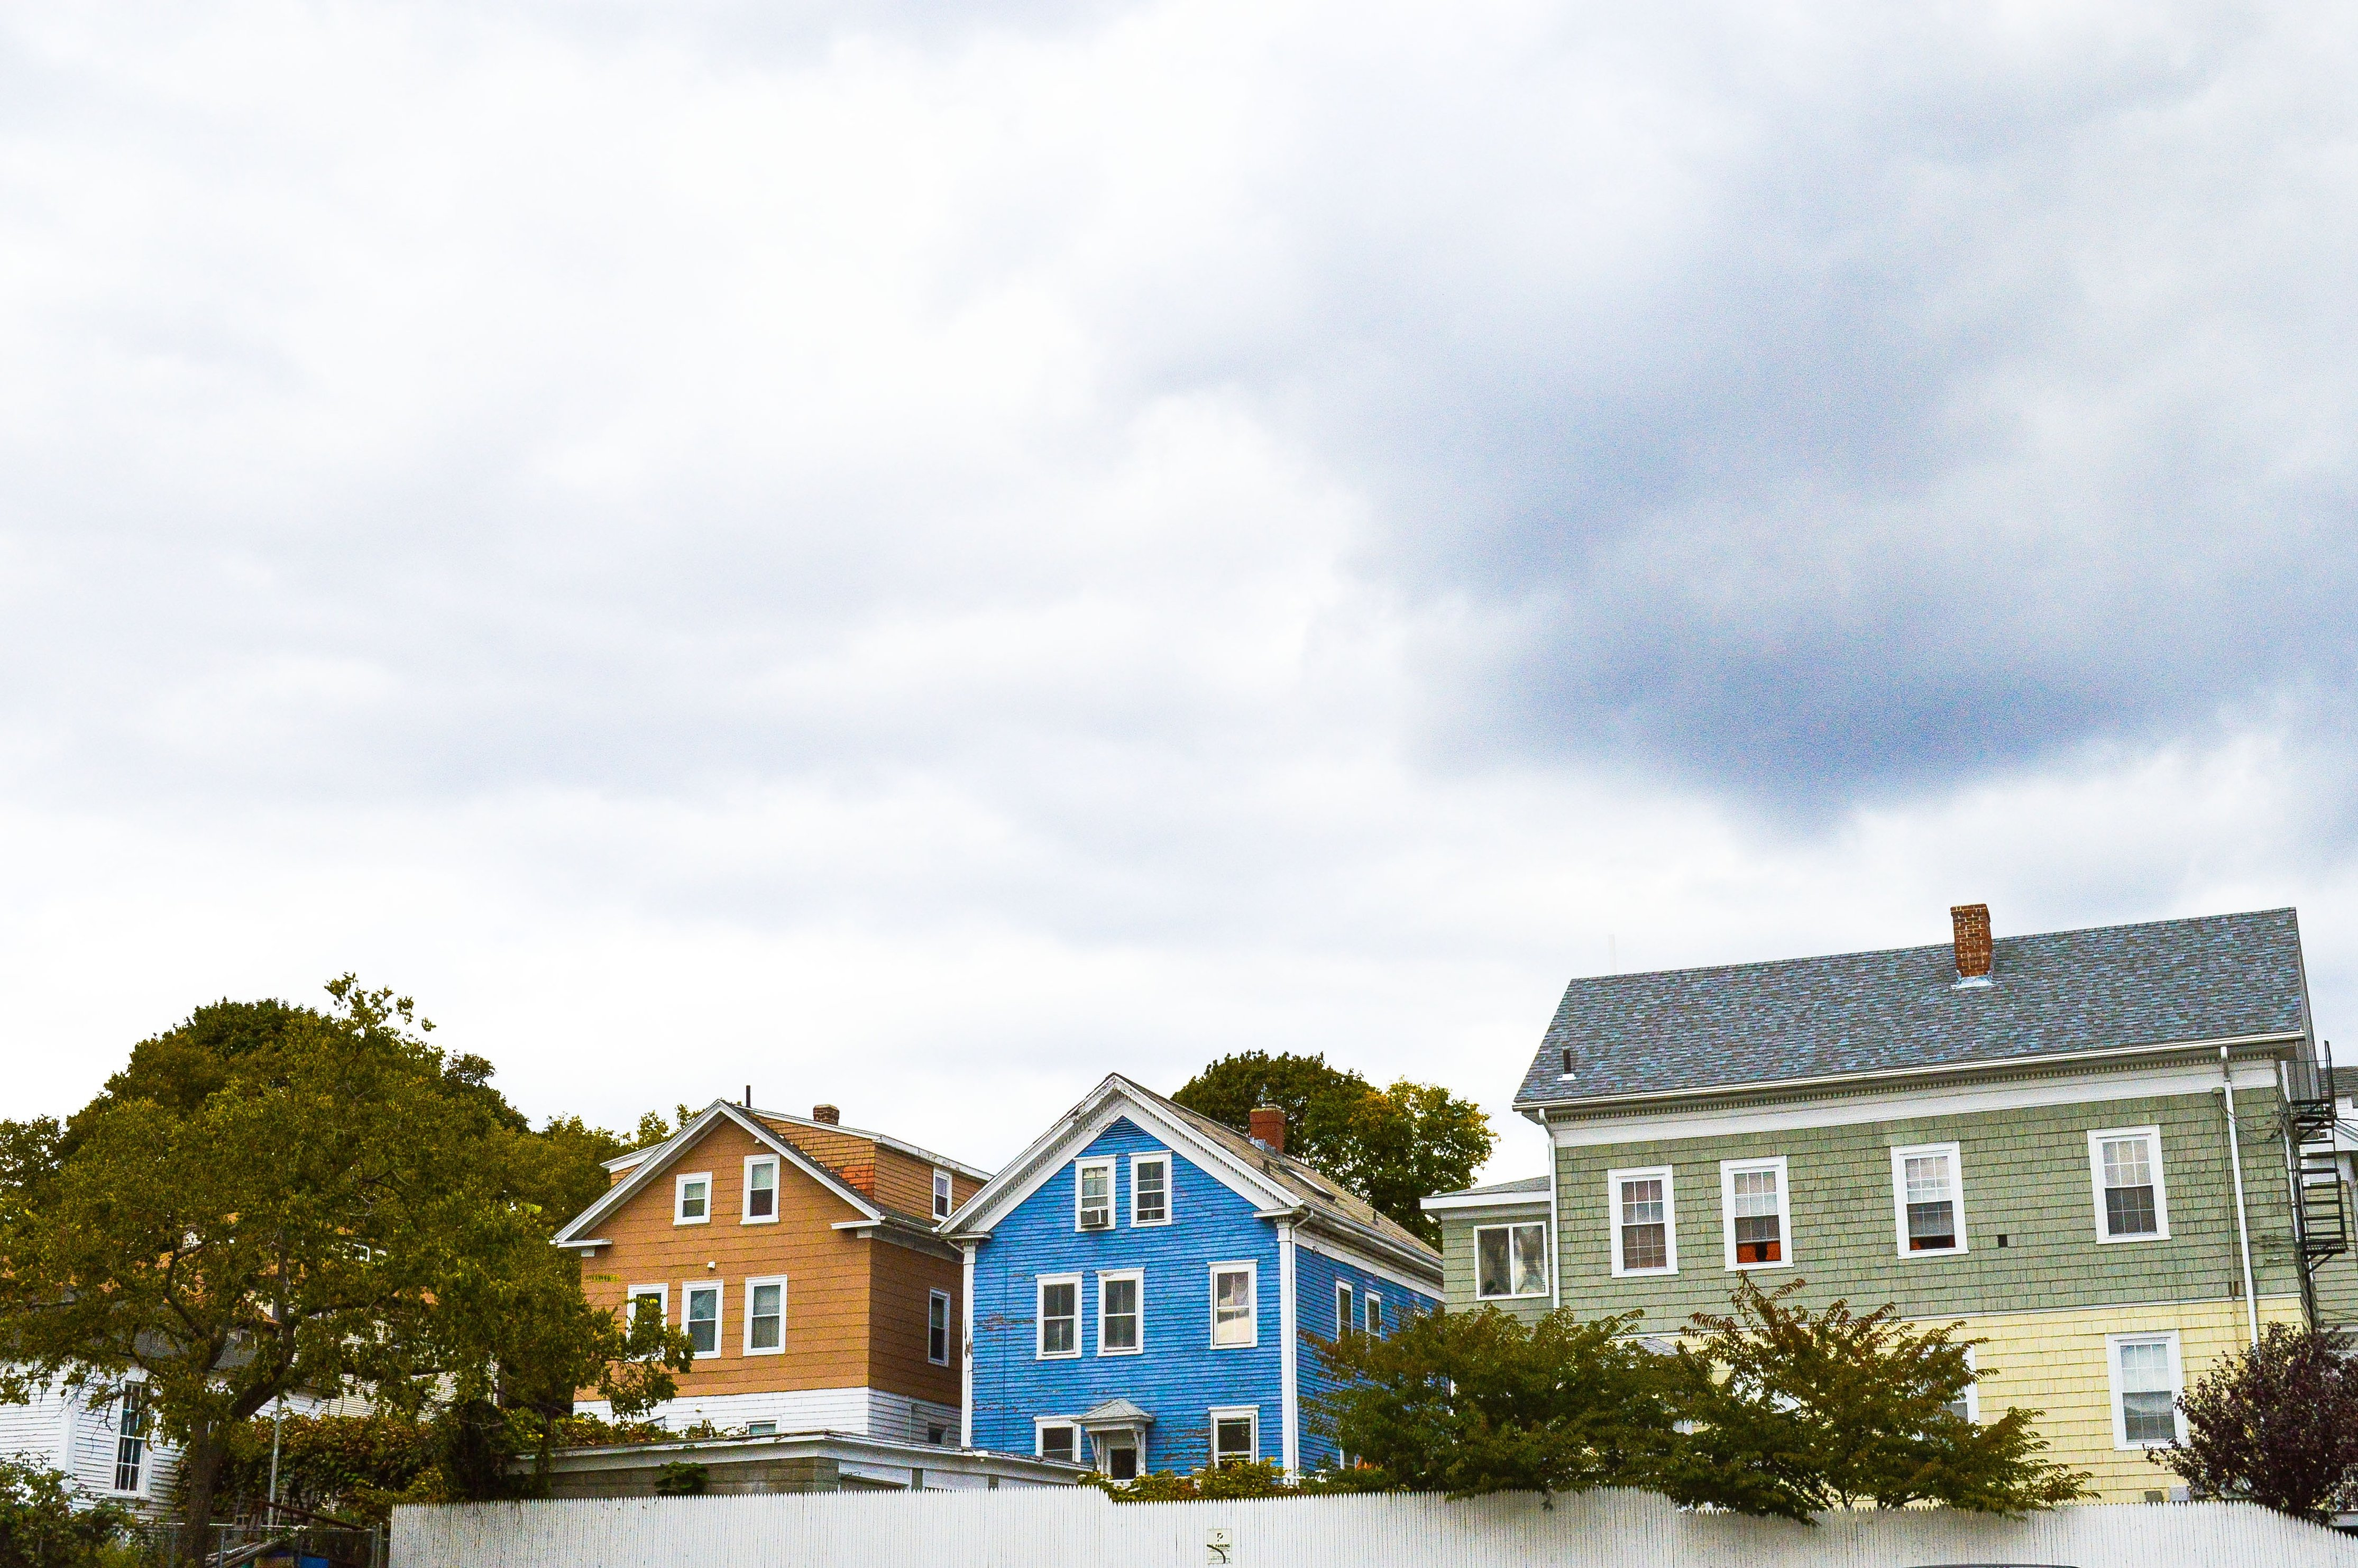

## Overview

Stakeholder: Home Flippers in King County looking to purchase a house and flip it for profit. 

Point of Interest: Sale price of a house

Question of Interest: What are the most important variables to consider when looking for houses to flip in King County? 

## Business Understanding

The purpose of the analysis is to provide actionable recommendations for home flippers seeking to purchase houses and flip them for profit. Our analysis shows that square footage of the house is an important factor such that increasing the house size will increase house price. Additionally, we found that house size's relationship to price needs to be analyzed in the context of the building quality as measured by the grading system used by the county. Home flippers can use this project’s findings to inform its business decision with respect to purchasing houses in King County.

## Data Understanding

This analysis used historical data on houses sold in 2014 and 2015 in King County, Washington.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from datetime import datetime

%matplotlib inline

## Exploring The Data

In [2]:
# Loading the dataset
df = pd.read_csv("data/kc_house_data.csv")

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### Checking the distribution of the target variable.

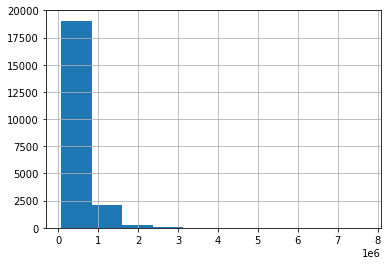

In [6]:
df['price'].hist();

In [7]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


#### Creating a new column that converts year built into house age. 

In [8]:
df["house_age"] = 2021 - df["yr_built"]

df = df.drop(columns=["id","yr_built"])

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,50.000324
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,6.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,24.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,46.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,70.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,121.000000


#### Detecting an outlier in bedrooms and dropping the observation.

In [10]:
df = df[df.bedrooms != 33]

#### Eliminating question marks from sqft_basement.

In [11]:
df = df[df.sqft_basement != "?"]

In [12]:
df.shape

(21142, 20)

#### Converting sqft_basement into binary––basement is 1 and no basement is 0.

In [13]:
df["sqft_basement"] = df["sqft_basement"].astype(str).astype(float).astype(int)

df["basement"] = [1 if x > 0 else 0 for x in df["sqft_basement"]]

#### Engineering 'season' feature.

In [14]:
# Creating 'month' feature first
df['month'] = df['date'].map(lambda x: datetime.strptime(x, "%m/%d/%Y").month)

#Creating a list that indicates season
seasons = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]

# Creating a dictionary that pairs each month with a season
month_to_season = dict(zip(range(1,13), seasons))

# Creating function that takes in month as an integer, and returns season as an integer.
def season(month):
    
    return month_to_season[month] 

# Creating 'season' feature using the season function
df['season'] = df['month'].map(lambda x: int(season(x)))

#### Engineering dummy variables from the 'season' feature.

In [15]:
# Creating dummies out of 'season' feature
# Create the OneHotEncoder object

ohe = OneHotEncoder(drop='first')


# Transform the data into dummies

trans = ohe.fit_transform(df[['season']])


# Store the dummies matrix and name vector

data = trans.todense()
names = ohe.get_feature_names()


# Put the dummy variables in a dataframe

dummies = pd.DataFrame(data, columns=names)


# Join the dummies dataframe to the original

df = df.join(dummies)

In [16]:
df.dropna(inplace=True)

In [17]:
# Making sure all of the dummy variables are integers

df['x0_2'] = df['x0_2'].map(lambda x:int(x))

df['x0_3'] = df['x0_3'].map(lambda x:int(x))

df['x0_4'] = df['x0_4'].map(lambda x:int(x))

#### Creating function to convert latitude into a binary––north of the county is 1 and south is 0.


In [18]:
def label_lat (row):
    if row['lat'] >= 47.5000 :
        return 1
    else:
        return 0 

#### Creating function to convert longitude into a binary––west side of the county is 1 and east side is 0.


In [19]:
def label_long (row):
    if row['long'] <= (-122.0000) :
        return 1
    else:
        return 0 

#### Engineering new feature for the latitude as a dummy.

In [20]:
df['county_lat'] = df.apply (lambda row: label_lat(row), axis=1)

#### Engineering new feature for the longitude as a dummy

In [21]:
df['county_long'] = df.apply (lambda row: label_long(row), axis=1)

In [22]:
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)
df.round(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,house_age,basement,month,season,x0_2,x0_3,x0_4,county_lat,county_long
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,7639,70,1,12,4,0,0,1,1,1
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,5000,56,1,12,4,0,0,1,1,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,7503,34,0,2,1,0,0,0,1,1
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,101930,20,1,5,2,1,0,0,1,1
8,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,8113,61,1,4,2,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21134,6/18/2014,1400000.0,4,2.75,3870,10046,2.0,0.0,0.0,3,...,10046,16,0,6,2,0,0,1,1,1
21135,7/2/2014,265050.0,2,1.50,800,2119,2.0,0.0,0.0,3,...,4800,13,0,7,3,0,0,0,1,1
21136,3/6/2015,450000.0,3,2.25,1620,1057,3.0,0.0,0.0,3,...,942,12,1,3,1,0,0,0,1,1
21137,5/5/2015,915000.0,4,2.50,2910,4356,3.0,0.0,0.0,3,...,4181,11,0,5,2,1,0,0,1,1


#### Checking features for normal distributions

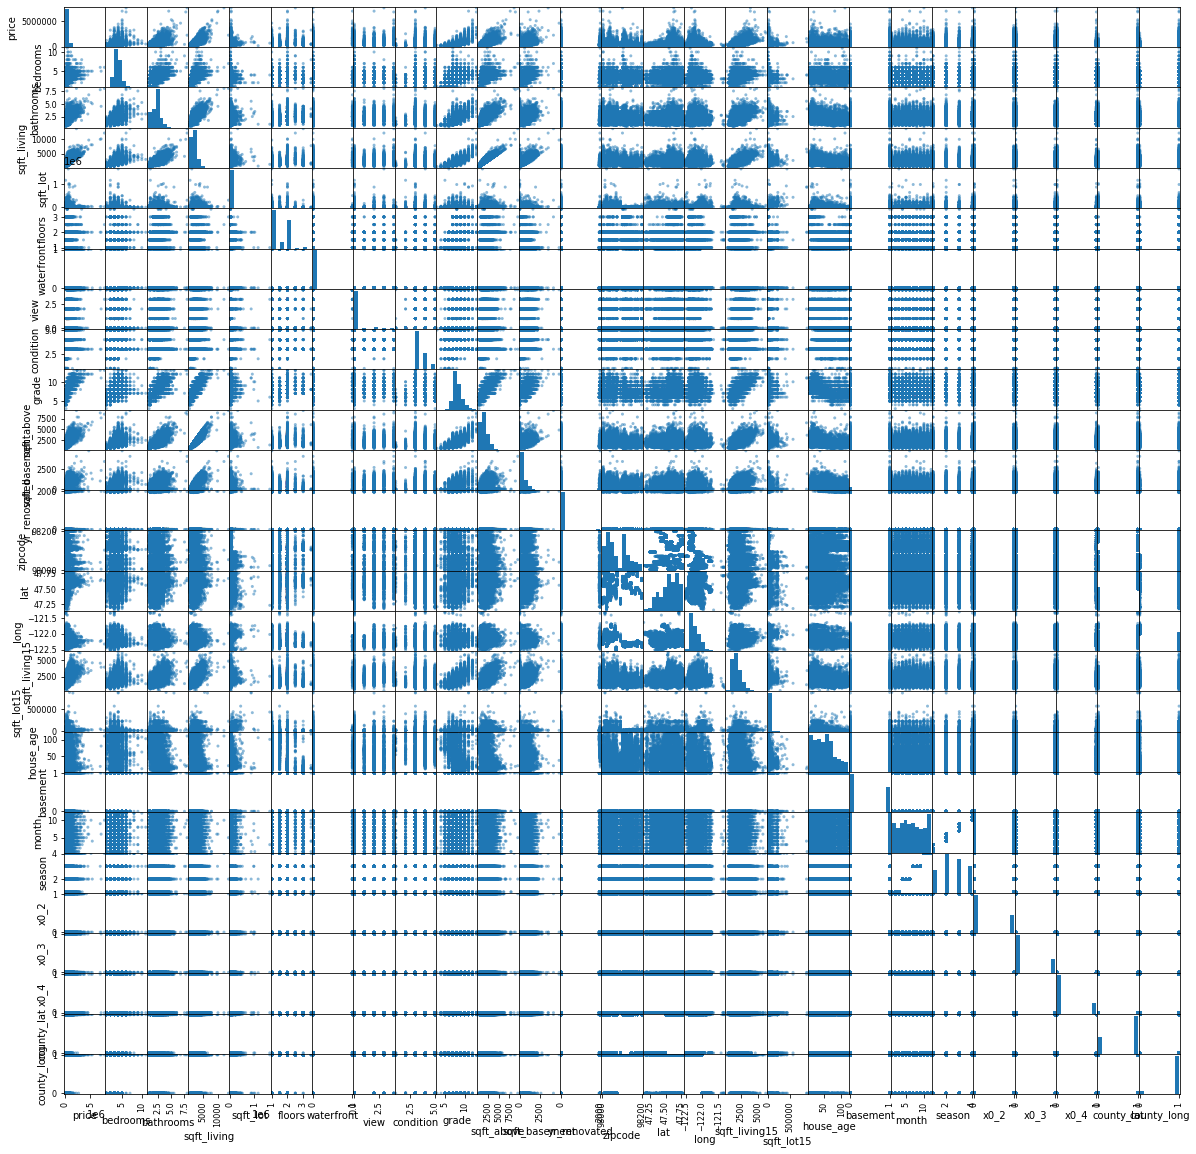

In [23]:
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show();

#### Logging the target variable and non-normal features to normalize their distributions

In [24]:
non_normal = ['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above','sqft_lot15', 'sqft_living15', 'house_age', 'lat']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))

#### Replacing infinite values with nans and then dropping them

In [25]:
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)
df.round(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,house_age,basement,month,season,x0_2,x0_3,x0_4,county_lat,county_long
1,12/9/2014,13.196,1.099,2.25,7.852,8.888,2.0,0.0,0.0,3,...,8.941,4.248,1,12,4,0,0,1,1,1
3,12/9/2014,13.311,1.386,3.00,7.581,8.517,1.0,0.0,0.0,5,...,8.517,4.025,1,12,4,0,0,1,1,1
4,2/18/2015,13.142,1.099,2.00,7.427,8.997,1.0,0.0,0.0,3,...,8.923,3.526,0,2,1,0,0,0,1,1
5,5/12/2014,14.023,1.386,4.50,8.598,11.532,1.0,0.0,0.0,3,...,11.532,2.996,1,5,2,1,0,0,1,1
8,4/15/2015,12.344,1.099,1.00,7.484,8.919,1.0,0.0,0.0,3,...,9.001,4.111,1,4,2,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21134,6/18/2014,14.152,1.386,2.75,8.261,9.215,2.0,0.0,0.0,3,...,9.215,2.773,0,6,2,0,0,1,1,1
21135,7/2/2014,12.488,0.693,1.50,6.685,7.659,2.0,0.0,0.0,3,...,8.476,2.565,0,7,3,0,0,0,1,1
21136,3/6/2015,13.017,1.099,2.25,7.390,6.963,3.0,0.0,0.0,3,...,6.848,2.485,1,3,1,0,0,0,1,1
21137,5/5/2015,13.727,1.386,2.50,7.976,8.379,3.0,0.0,0.0,3,...,8.338,2.398,0,5,2,1,0,0,1,1


#### Creating three interaction terms––we considered how the features are related based on our own knowledge and intuition.

In [26]:
df['sqft_house_neighbors'] = df['sqft_living'] * df['sqft_living15']

df['sqft_age'] = df['sqft_living'] * df['house_age']

df['sqft_grade'] = df['sqft_living'] * df['grade']

In [27]:
df.shape

(15127, 31)

#### Creating a function that takes in a target variable and a list of feature columns,  and prints out the R squared value and Root Mean Squared Error of the training and testing data, as well as printing an Ordinary Least Squares regression table.

In [28]:
def multiple_regression(target, list_xcol):
    
    # Preparing data
    y = target

    X = df[list_xcol]


    # Performing split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)


    # Creating Model
    reg = LinearRegression()


    # Fitting the model to the dataset
    result = reg.fit(X_train, y_train)


    # Testing model's predictive power using training and testing data
    y_hat_train = result.predict(X_train)

    y_hat_test = result.predict(X_test)

    
    # Getting R squared scores for training and testing data
    y_train_r2 = r2_score(y_train, y_hat_train)

    y_test_r2 = r2_score(y_test, y_hat_test)

    print(f'R-Squared score for the training data: {y_train_r2}')

    print('')
    
    print(f'R-Squared score for the testing data: {y_test_r2}')
    
    
    print('')
    print('')
    
          
    # Getting Mean Squared Error for training and testing data
    y_train_rmse = mean_squared_error(np.exp(y_train), np.exp(y_hat_train), squared = False)

    y_test_rmse = mean_squared_error(np.exp(y_test), np.exp(y_hat_test), squared = False)

    print(f'Root Mean Squared Error for the training data: {y_train_rmse}')

    print('')
    
    print(f'Root Mean Squared Error for the testing data: {y_test_rmse}')
          
    
    # Adding training data as constant for OLS model
    X_train = sm.add_constant(X_train)


    # Creating the model object
    model = sm.OLS(y_train, X_train)


    # Fitting the model to the dataset
    result = model.fit()


    # Printing the summary output
    return result.summary()


## Baseline Model––Including As Many Features As We Considered Relevant

In [29]:
# Set X and y
xcol = ['bedrooms', 
        'bathrooms', 
        'sqft_living', 
        'sqft_lot', 
        'sqft_above',
        'floors', 
        'waterfront', 
        'condition', 
        'grade',  
        'lat', 
        'long', 
        'sqft_living15', 
        'sqft_lot15', 
        'house_age']

target = df['price']

In [30]:
multiple_regression(target, xcol)

R-Squared score for the training data: 0.7500769638380465

R-Squared score for the testing data: 0.7560481466358132


Root Mean Squared Error for the training data: 194454.1986899824

Root Mean Squared Error for the testing data: 199367.05832564252


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     2429.
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:10:55   Log-Likelihood:                -970.41
No. Observations:               11345   AIC:                             1971.
Df Residuals:                   11330   BIC:                             2081.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -261.5928      4.389    -59.598      0.000    -270.196    -252.989
bedrooms         -0.1287      0.012    -10.737      0.000      -0.152      -0.105
bathrooms         0.0589      0.006     10.285      0.000       0.048       0.070
sqft_living       0.3770      0.016     23.269      0.000       0.345       0.409
sqft_lot          0.0306      0.007      4.213      0.000       0.016       0.045
sqft_above        0.0048      0.015      0.318      0.750      -0.025       0.034
floors            0.0438      0.007      5.968      0.000       0.029       0.058
waterfront        0.6077      0.029     21.306      0.000       0.552       0.664
condition         0.0713      0.004     17.229      0.000       0.063       0.079
grade             0.1617      0.004     43.368      0.000       0.154       0.169
lat              65.2322      0.900     72.513      0.000      63.469      66.996
long             -0.1332      0.022     -6.041      0.000      -0.176      -0.090
sqft_living15     0.2488      0.013     19.443      0.000       0.224       0.274
sqft_lot15       -0.0614      0.008     -7.799      0.000      -0.077      -0.046
house_age         0.1172      0.005     21.640      0.000       0.107       0.128
==============================================================================
Omnibus:                      214.053   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.579
Skew:                           0.204   Prob(JB):                     5.44e-71
Kurtosis:                       3.720   Cond. No.                     2.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Second Model––Introducing Three Interaction Terms To Baseline Model

In [31]:
# Set X and y
xcol2 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot',
         'sqft_above',
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'house_age',
         'basement',
         'sqft_house_neighbors',
         'sqft_grade',
         'sqft_age']

target = df['price']

In [32]:
multiple_regression(target, xcol2)

R-Squared score for the training data: 0.7557301640029324

R-Squared score for the testing data: 0.7626451947929344


Root Mean Squared Error for the training data: 189414.01402000923

Root Mean Squared Error for the testing data: 191001.42601227175


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     1947.
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:10:55   Log-Likelihood:                -840.63
No. Observations:               11345   AIC:                             1719.
Df Residuals:                   11326   BIC:                             1859.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -258.6610      4.458    -58.016      0.000    -267.400    -249.922
bedrooms                -0.1000      0.012     -8.312      0.000      -0.124      -0.076
bathrooms                0.0468      0.006      8.082      0.000       0.035       0.058
sqft_living              0.5787      0.155      3.742      0.000       0.276       0.882
sqft_lot                 0.0276      0.007      3.831      0.000       0.013       0.042
sqft_above               0.1455      0.025      5.727      0.000       0.096       0.195
floors                   0.0578      0.007      7.821      0.000       0.043       0.072
waterfront               0.5937      0.028     20.977      0.000       0.538       0.649
condition                0.0768      0.004     18.701      0.000       0.069       0.085
grade                   -0.1664      0.048     -3.437      0.001      -0.261      -0.071
lat                     64.8348      0.892     72.668      0.000      63.086      66.584
long                    -0.1014      0.022     -4.623      0.000      -0.144      -0.058
sqft_living15            0.6345      0.170      3.727      0.000       0.301       0.968
sqft_lot15              -0.0624      0.008     -8.002      0.000      -0.078      -0.047
house_age                0.6458      0.079      8.143      0.000       0.490       0.801
basement                 0.0965      0.011      8.993      0.000       0.075       0.118
sqft_house_neighbors    -0.0519      0.022     -2.312      0.021      -0.096      -0.008
sqft_grade               0.0419      0.006      6.691      0.000       0.030       0.054
sqft_age                -0.0705      0.010     -6.833      0.000      -0.091      -0.050
==============================================================================
Omnibus:                      192.731   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.245
Skew:                           0.165   Prob(JB):                     1.16e-67
Kurtosis:                       3.737   Cond. No.                     2.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Third Model––Four Interaction Terms, Columns For Latitude And Longitude As Binary, Dummy Variables For Season

In [33]:
# Set X and y
xcol3 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot',
         'sqft_above',
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'house_age',
         'basement',
         'sqft_grade',
         'sqft_house_neighbors',
         'sqft_age',
         'x0_2',
         'x0_3',
         'x0_4',
         'county_lat',
         'county_long']

target = df['price']

In [34]:
multiple_regression(target, xcol3)

R-Squared score for the training data: 0.782447698106668

R-Squared score for the testing data: 0.7876577656685563


Root Mean Squared Error for the training data: 180475.61184288148

Root Mean Squared Error for the testing data: 185615.04233890134


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1770.
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:10:55   Log-Likelihood:                -183.56
No. Observations:               11345   AIC:                             415.1
Df Residuals:                   11321   BIC:                             591.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -97.8745      6.341    -15.434      0.000    -110.304     -85.444
bedrooms                -0.0904      0.011     -7.946      0.000      -0.113      -0.068
bathrooms                0.0451      0.005      8.252      0.000       0.034       0.056
sqft_living              0.7483      0.146      5.123      0.000       0.462       1.035
sqft_lot                 0.0390      0.007      5.731      0.000       0.026       0.052
sqft_above               0.1804      0.024      7.519      0.000       0.133       0.227
floors                   0.0404      0.007      5.746      0.000       0.027       0.054
waterfront               0.5947      0.027     22.259      0.000       0.542       0.647
condition                0.0756      0.004     19.467      0.000       0.068       0.083
grade                   -0.1676      0.046     -3.667      0.000      -0.257      -0.078
lat                     20.5190      1.463     14.023      0.000      17.651      23.387
long                    -0.1728      0.025     -6.996      0.000      -0.221      -0.124
sqft_living15            0.8560      0.161      5.322      0.000       0.541       1.171
sqft_lot15              -0.0428      0.007     -5.797      0.000      -0.057      -0.028
house_age                0.4693      0.075      6.244      0.000       0.322       0.617
basement                 0.0844      0.010      8.324      0.000       0.065       0.104
sqft_grade               0.0401      0.006      6.778      0.000       0.028       0.052
sqft_house_neighbors    -0.0847      0.021     -3.988      0.000      -0.126      -0.043
sqft_age                -0.0507      0.010     -5.191      0.000      -0.070      -0.032
x0_2                     0.0109      0.007      1.614      0.107      -0.002       0.024
x0_3                     0.0044      0.007      0.636      0.525      -0.009       0.018
x0_4                    -0.0022      0.007     -0.301      0.764      -0.016       0.012
county_lat               0.3597      0.010     36.964      0.000       0.341       0.379
county_long              0.0078      0.012      0.662      0.508      -0.015       0.031
==============================================================================
Omnibus:                      224.683   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.261
Skew:                           0.131   Prob(JB):                     3.34e-92
Kurtosis:                       3.907   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity o

#### Interpretation: For a home flipper who wants to make improvements that will increase the sale price of a house, square feet, square feet given grade, and number of bathrooms, are three features that are operable and and cause the largest increase in the sale price of a house in terms of percentage.

#### Unlogging the target variable 'price' so that calculations and visualizations will be in terms of dollars.


In [35]:
unlogged_price_df = df['price'].map(lambda x:np.exp(x))


mean = unlogged_price_df.mean()

#### Creating function that takes in a series, an interaction coefficient, and the coefficient of the feature whose effect will be isolated from the interaction term.

In [36]:
def interaction_term_isolator(iso_coef, int_coef, series):

    mean = df[series].mean()

    impact = iso_coef + (int_coef*(mean))
    
    return impact


#### Isolating sqft_living from the sqft_grade interaction term.

In [37]:
sqft_living_coef = 0.7483

sqft_grade_coef = 0.0401

interaction_term_isolator(sqft_living_coef, sqft_grade_coef, 'grade')

1.0551563231308256

#### Calculating the true impact of adding a bathroom on percent growth in price.

In [38]:
bathroom_coef = 0.0451

bathroom_impact_price = (np.exp(bathroom_coef)-1)*100

bathroom_impact_price

4.613246792502146

#### Preparing variables for calculations and visualizations.

In [39]:
bathroom_impact_price = 4.613246792502146


sqft_coef = 0.7483


sqft_given_grade_coef = 1.0551563231308256


# Creating a list of all the coefficients for visualization
coefs = [bathroom_impact_price, sqft_coef, sqft_given_grade_coef]


names = ['Bathrooms', 'Square Feet', 'Square Feet Given Grade']


coefs_names = zip(coefs, names)

#### For a house of average price, \\$540,168, if you increase the square footage of the entire living space by 1%, it will increase sale price by  ~$4,000. 


In [40]:
increase_sale_price_sqft = sqft_living_coef/100 * mean 

increase_sale_price_sqft

4042.0843544322074

#### For a house with an average grade and an average price, if you increase the square footage of the entire living space by 1%, it will increase the sale price by ~$5,700.

In [41]:
increase_sale_price_sqft_grade = sqft_given_grade_coef/100 * mean 

increase_sale_price_sqft_grade

5699.626974752539

#### For a house of an price, one additional bathroom will increase sale price by ~\\$25,000.

In [42]:
increase_sale_price_bathroom = bathroom_impact_price/100 * mean 

increase_sale_price_bathroom

24919.327386218745

#### Creating line graphs that demonstrate the difference in effect of the selected features on sale price.

''

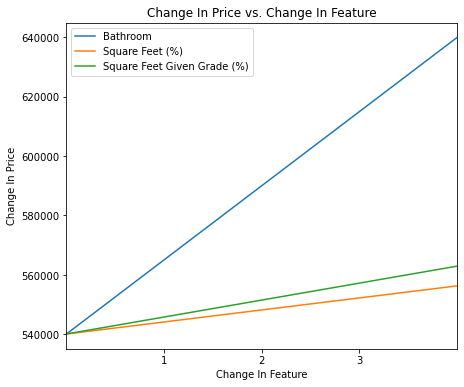

In [43]:
# Creating figure and axes
fig, ax = plt.subplots(figsize = (7,6))


x = [0,1,2,3,4]

# Calculating y values for bathroom
y1 = [(mean+(0*(mean*(coefs[0]/100)))), (mean+(1*(mean*(coefs[0]/100)))), (mean+(2*(mean*(coefs[0]/100)))), (mean+(3*(mean*(coefs[0]/100)))), (mean+(4*(mean*(coefs[0]/100))))]

# Calculating y values for square feet
y2 = [(mean+(0*(mean*(coefs[1]/100)))), (mean+(1*(mean*(coefs[1]/100)))), (mean+(2*(mean*(coefs[1]/100)))), (mean+(3*(mean*(coefs[1]/100)))), (mean+(4*(mean*(coefs[1]/100))))]

# Calculating y values for square feet given grade
y3 = [(mean+(0*(mean*(coefs[2]/100)))), (mean+(1*(mean*(coefs[2]/100)))), (mean+(2*(mean*(coefs[2]/100)))), (mean+(3*(mean*(coefs[2]/100)))), (mean+(4*(mean*(coefs[2]/100))))]


# Creating line for effect of bathrooms on price
line1, = plt.plot(x,y1)

# Creating line for effect of square feet on price
line2, = plt.plot(x,y2)

# Creating line for effect of square feet at a given grade on price
line3, = plt.plot(x,y3)


ax.set_title(f'Change In Price vs. Change In Feature')
ax.set_xlabel(f'Change In Feature')
ax.set_ylabel(f'Change In Price')
ax.set_xticks([1,2,3])
ax.set_xlim(0,4)
ax.legend([line1,line2,line3,], ['Bathroom', 'Square Feet (%)', 'Square Feet Given Grade (%)', 'Grade Given Square Feet'], loc = 'upper left')
;

  

#### Creating separate line graphs for each selected feature to demonstrate their relationship with price.

''

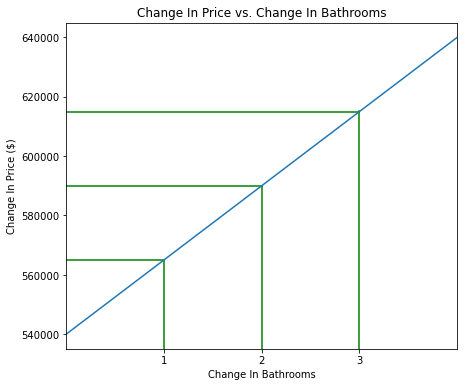

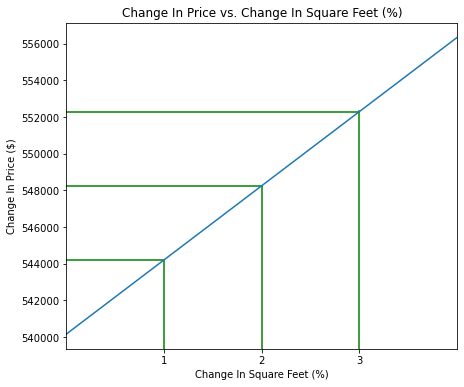

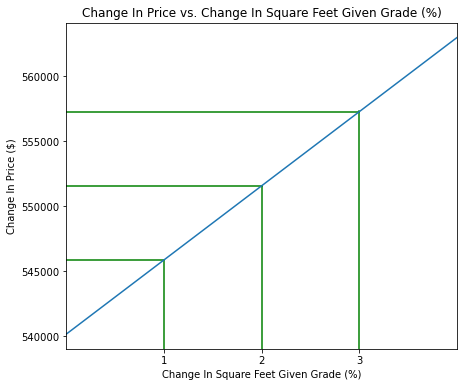

In [44]:
# Creating for loop to generate graph for each separate feature

for co, name in coefs_names:
    
    # Creating figure and axes
    fig, ax = plt.subplots(figsize = (7,6))
    
    x = [0,1,2,3,4]
    
    
    # Calculating y values for each feature 
    y = [(mean+(0*(mean*(co/100)))), (mean+(1*(mean*(co/100)))), (mean+(2*(mean*(co/100)))), (mean+(3*(mean*(co/100)))), (mean+(4*(mean*(co/100))))]
    
    
    # Creating a horizontal line for every y value 
    xmax = [.25, .5, .75]
    
    y_xmax = zip(y[1:4],xmax)
    
    for i,t in y_xmax:
        ax.axhline(i, xmax=t, color='g',linestyle='-',mew=.2)
    
    
    # Creating a vertical line for every x value
    ticks_y = zip([1,2,3], [.27, .5, .73])    
    
    for a,b in ticks_y:
        ax.axvline(a, ymax=b, color='g', linestyle='-',mew=.2)

     
        
    ax.set_title(f'Change In Price vs. Change In {name} (%)')
    
    if name == 'Square Feet' or name == "Square Feet Given Grade":
        ax.set_title(f'Change In Price vs. Change In {name} (%)')
        ax.set_xlabel(f'Change In {name} (%)')
        
    else:
        ax.set_title(f'Change In Price vs. Change In {name}')
        ax.set_xlabel(f'Change In {name}')
        
    ax.set_ylabel(f'Change In Price ($)')
    ax.set_xticks([1,2,3])
    ax.set_xlim(0,4)
    
    
    # Plotting each feature on axes
    plt.plot(x,y)
;
    
    
    

## Conclusions

This analysis leads to three main recommendations for home flippers in King County, WA:
 - **Increase the square feet of a house for large projects.** A 1% increase in square feet leads to a ~0.74% increase in sale price.
 - **Consider the grade (construction quality) of a house when purchasing for the purpose of flipping.** Given a house with an average grade, a 1% increase in square feet leads to a ~1.1% increase in sale price.
 - **Increase the number of bathrooms in a house for small projects.** Every additional bathroom added to house leads to a ~4.6% increase in sale price.

## Next Steps

Given time for further analysis of the data, we may be able to create better models by:
 - **Calculating ratios of relevant interaction terms to put data into better perspective.** For example, bedroom to bathroom ratio or house size to lot size ratio. 
 - **Find real estate data that includes other relevant information impacting sale price.** For example, kitchens and the presence of a pool. 
 - **Renovation cost in King County by house size for budget analysis.** For example, calculate the average cost of building a bathroom in a house in King County